In [3]:
#Linear regression
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
df=pd.read_csv("/home/kshitija/Desktop/Dsbba_assigments/BostonHousing/Boston.csv")

In [5]:
df

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.dtypes

Unnamed: 0      int64
crim          float64
zn            float64
indus         float64
chas            int64
nox           float64
rm            float64
age           float64
dis           float64
rad             int64
tax             int64
ptratio       float64
black         float64
lstat         float64
medv          float64
dtype: object

In [8]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
crim          0
zn            0
indus         0
chas          0
nox           0
rm            0
age           0
dis           0
rad           0
tax           0
ptratio       0
black         0
lstat         0
medv          0
dtype: int64

<Axes: >

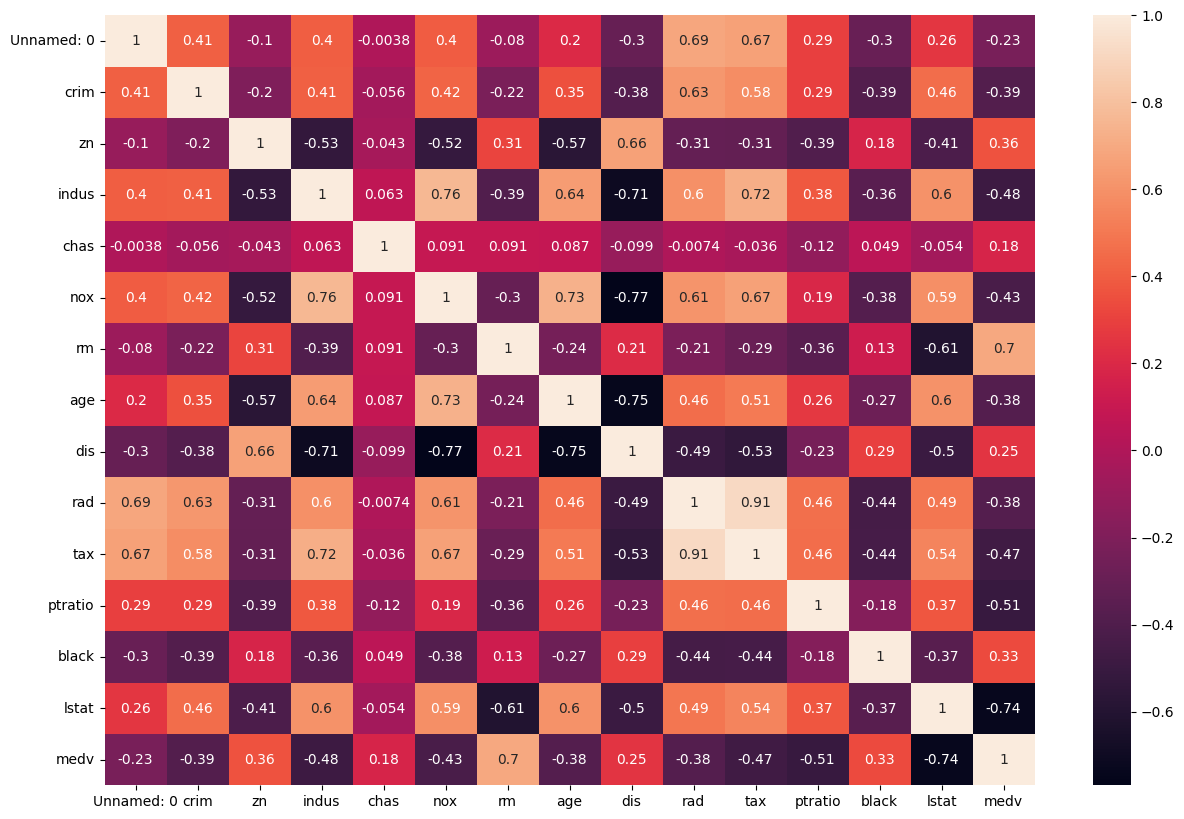

In [11]:
# Plotting heatmap for correlation matrix
plt.figure(figsize=(15,10))
correlation_matrix=df.corr()
sns.heatmap(data=correlation_matrix,annot=True)

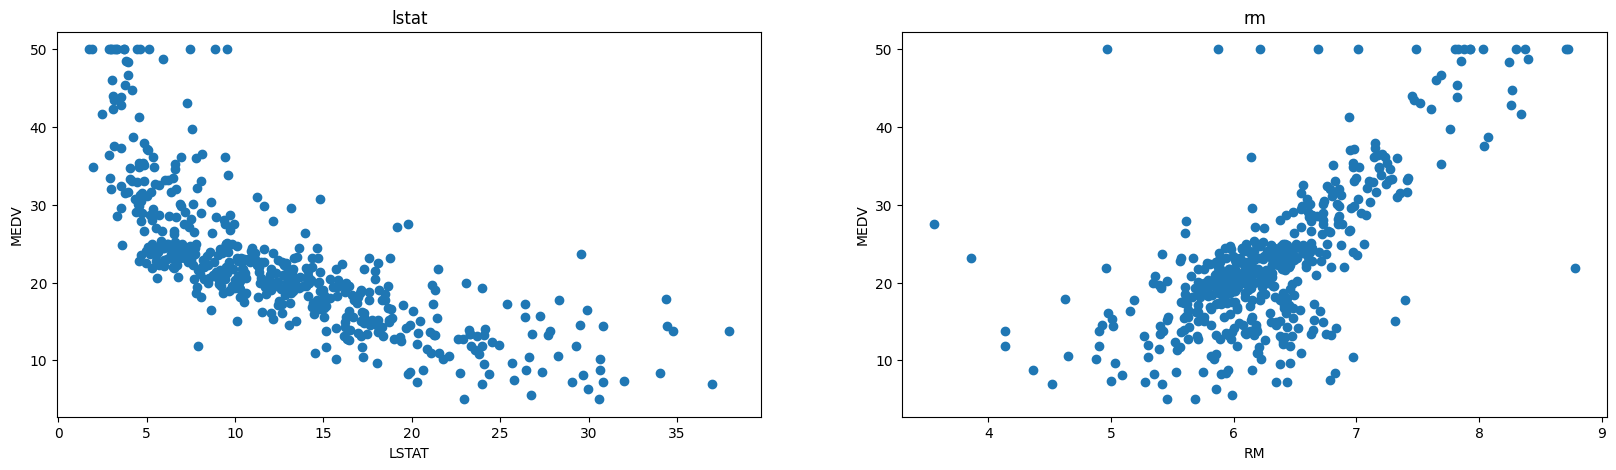

In [16]:
# Plotting scatter plot for MEDV and lstat and rm
plt.figure(figsize=(20,5))
options=["lstat","rm"]
target=df["medv"]
for i,col in enumerate(options):
    plt.subplot(1,len(options),i+1)
    x=df[col]
    y=target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col.upper())
    plt.ylabel("MEDV")
    
    

In [20]:
#concatenation lstat and rm columns to form new dataframe
X = pd.DataFrame(np.c_[df["lstat"],df["rm"]],columns = ["lstat","rm"])
Y=df["medv"]
print("X: \n", X)
print("Y: \n", Y)

X: 
      lstat     rm
0     4.98  6.575
1     9.14  6.421
2     4.03  7.185
3     2.94  6.998
4     5.33  7.147
..     ...    ...
501   9.67  6.593
502   9.08  6.120
503   5.64  6.976
504   6.48  6.794
505   7.88  6.030

[506 rows x 2 columns]
Y: 
 0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64


In [21]:
# splitting the dataset into training and testing sets(80% training, 20% testing)
X_train,X_test, Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=5)
print(X_train.shape)

(404, 2)


In [23]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, Y_train)


LinearRegression()

In [26]:
train_prediction=lin_reg_model.predict(X_train)
rmse=np.sqrt(mean_squared_error(Y_train,train_prediction))
r2=r2_score(Y_train,train_prediction)
print("For training dataset : ")
print("Root mean square error is {}".format(rmse))
print("Accuracy is {}%".format(r2))

test_prediction = lin_reg_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test,test_prediction))
r2 = r2_score(Y_test, test_prediction)
print("For Training dataset : ")
print("Root Mean Square Error is {}".format(rmse))
print("Accuracy is {}%".format(r2))

For training dataset : 
Root mean square error is 5.637129335071195
Accuracy is 0.6300745149331701%
For Training dataset : 
Root Mean Square Error is 5.137400784702911
Accuracy is 0.6628996975186952%
